# Multinominal Classification
## Mnist dataset classification
Classify 28x28 bit image as a digit from 0-9


In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import random
from progressbar import progressbar
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import time

## Feed-Forward Neural Network Architecture

In [0]:
def build_fc_model(activation):
    fc_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        # TODO: Define the rest of the model.
        tf.keras.layers.Dense(128, input_shape=(784,), activation=activation),
        tf.keras.layers.Dense(10, activation='softmax')

    ])
    return fc_model

## Convolutional Neural Network Architecture

In [0]:
def build_cnn_model(activation):
    cnn_model = tf.keras.Sequential([
       # TODO: Define the model.
       tf.keras.layers.Conv2D(24, 3, activation = activation, input_shape=(28,28,1,)),
       tf.keras.layers.MaxPooling2D(),
       tf.keras.layers.Conv2D(36, 3, activation = activation),
       tf.keras.layers.MaxPooling2D(),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(784, activation=activation),
       tf.keras.layers.Dense(128, activation=activation),
       tf.keras.layers.Dense(10, activation='softmax')
    ])
    return cnn_model

## Experiment code to be able to run different configurations

In [0]:
def run_experiment(build_model, activation, optimizer, loss, X, y, verbose = 1):
  model = build_model(activation)
  BATCH_SIZE = 64
  EPOCHS = 5
  train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, random_state=0)
  
  
  # TODO compile and fit the model with the appropriate parameters.
  model.compile(loss=loss, metrics=['categorical_accuracy'], optimizer=optimizer)
  
  start = time.time()
  history = model.fit(train_X, train_y, verbose=verbose, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (val_X, val_y) )
  end = time.time()
  
  model.summary()
  
  # Plot training & validation accuracy values
  plt.plot(history.history['categorical_accuracy'])
  plt.plot(history.history['val_categorical_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  print('Last validation loss : ', history.history['val_loss'][-1], ' | last training loss : ', history.history['loss'][-1])
  print('Last validation accuracy : ', history.history['val_categorical_accuracy'][-1], ' | last training accuracy : ', history.history['categorical_accuracy'][-1])
  print('Time taken in training : ', end - start, ' sec')
  return model, history.history['val_categorical_accuracy'][-1]
  

## Get best configuration from model dictionary according to highest validation accuracy

In [0]:
def get_best_configuration(models):
  maxVal = 0
  maxkey = ''
  for key,(model, value) in models.items():
    if (value > maxVal):
      maxkey = key
      maxVal = value
  return maxkey

## Model evaluation code

In [0]:
def evaluate_model(model, test_X, test_y):
  BATCH_SIZE = 64
  start = time.time()
  test_loss, test_acc = model.evaluate(test_X, test_y, verbose = 0, batch_size = BATCH_SIZE)
  end = time.time()
  print('Test loss:', test_loss)
  print('Test accuracy:', test_acc)
  print('Time taken in training : ', end - start, ' sec')

___
## Dataset setup

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis=-1)/255.
test_labels = np.int64(test_labels)
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
print('After one hot encoding :', train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)
After one hot encoding : (60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


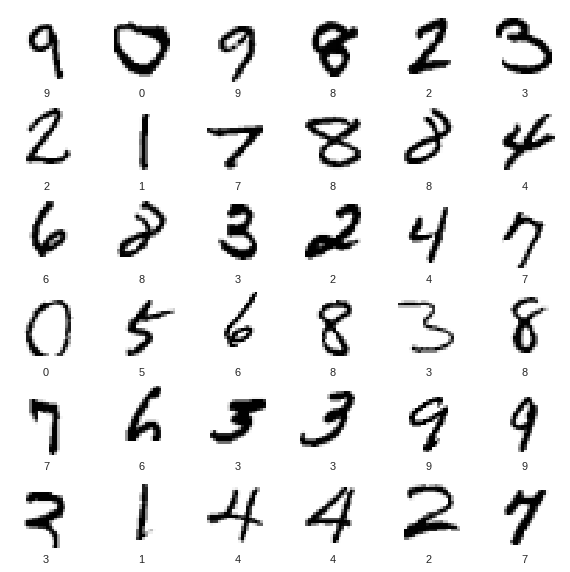

In [0]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(np.where(1 == train_labels[image_ind])[0][0])

---
# Fully connected configuration experiments
All will use categorical crossentropy loss.

In [0]:
fc_models = {}

#### Default Adam with tanh

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 136us/sample - loss: 0.3522 - categorical_accuracy: 0.8999 - val_loss: 0.2129 - val_categorical_accuracy: 0.9394
Epoch 2/5
48000/48000 [==============================] - 5s 101us/sample - loss: 0.1854 - categorical_accuracy: 0.9470 - val_loss: 0.1620 - val_categorical_accuracy: 0.9525
Epoch 3/5
48000/48000 [==============================] - 5s 99us/sample - loss: 0.1319 - categorical_accuracy: 0.9624 - val_loss: 0.1259 - val_categorical_accuracy: 0.9626
Epoch 4/5
48000/48000 [==============================] - 5s 95us/sample - loss: 0.1009 - categorical_accuracy: 0.9716 - val_loss: 0.1072 - val_categorical_accuracy: 0.9681
Epoch 5/5
48000/48000 [==============================] - 5s 96us/sample - loss: 0.0798 - categorical_accuracy: 0.9774 - val_loss: 0.0994 - val_categorical_accuracy: 0.9693
_________________________________________________________________
Layer (type)          

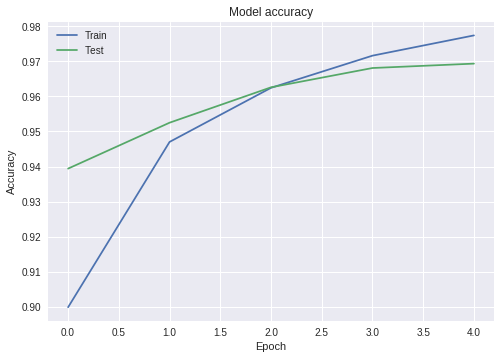

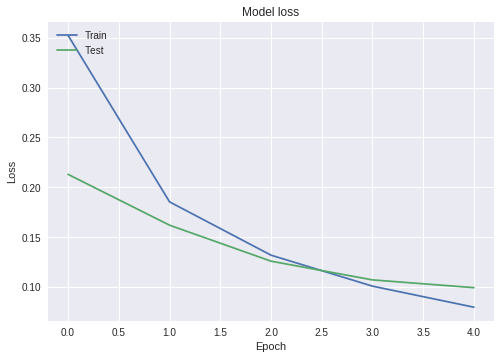

Last validation loss :  0.09937453757723172  | last training loss :  0.07977328032627702
Last validation accuracy :  0.96933335  | last training accuracy :  0.977375
Time taken in training :  27.41925072669983  sec


In [0]:
fc_models['adam_tanh'] = run_experiment(build_fc_model, 'tanh', 'adam', 'categorical_crossentropy', train_images, train_labels)

#### Adam with learning rate 0.05 and tanh activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 145us/sample - loss: 0.2518 - categorical_accuracy: 0.9232 - val_loss: 0.1431 - val_categorical_accuracy: 0.9584
Epoch 2/5
48000/48000 [==============================] - 5s 101us/sample - loss: 0.1220 - categorical_accuracy: 0.9628 - val_loss: 0.1151 - val_categorical_accuracy: 0.9647
Epoch 3/5
48000/48000 [==============================] - 5s 100us/sample - loss: 0.0858 - categorical_accuracy: 0.9728 - val_loss: 0.1066 - val_categorical_accuracy: 0.9677
Epoch 4/5
48000/48000 [==============================] - 5s 97us/sample - loss: 0.0686 - categorical_accuracy: 0.9782 - val_loss: 0.1057 - val_categorical_accuracy: 0.9688
Epoch 5/5
48000/48000 [==============================] - 5s 97us/sample - loss: 0.0606 - categorical_accuracy: 0.9800 - val_loss: 0.1097 - val_categorical_accuracy: 0.9663
_________________________________________________________________
Layer (type)         

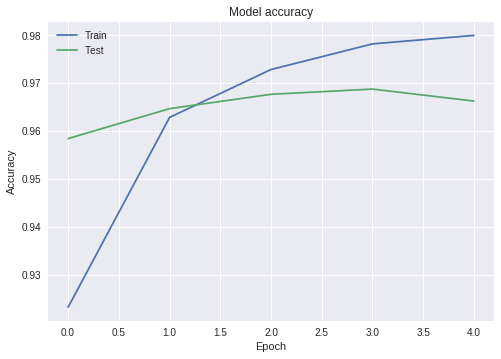

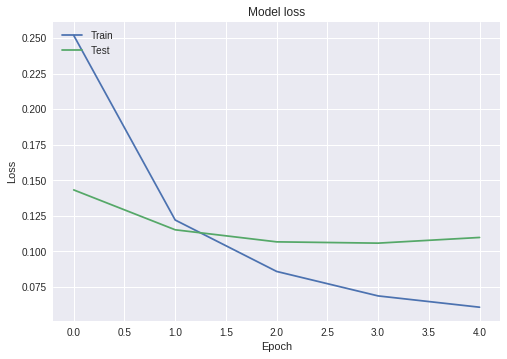

Last validation loss :  0.10969211432834466  | last training loss :  0.06063181223099431
Last validation accuracy :  0.96625  | last training accuracy :  0.97995836
Time taken in training :  28.098117113113403  sec


In [0]:
fc_models['adam_0.005_tanh'] = run_experiment(build_fc_model, 'tanh', tf.keras.optimizers.Adam(0.005), 'categorical_crossentropy', train_images, train_labels)

#### SGD and tanh activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 128us/sample - loss: 0.8958 - categorical_accuracy: 0.7814 - val_loss: 0.5300 - val_categorical_accuracy: 0.8659
Epoch 2/5
48000/48000 [==============================] - 4s 84us/sample - loss: 0.4725 - categorical_accuracy: 0.8758 - val_loss: 0.4150 - val_categorical_accuracy: 0.8901
Epoch 3/5
48000/48000 [==============================] - 4s 85us/sample - loss: 0.4007 - categorical_accuracy: 0.8901 - val_loss: 0.3693 - val_categorical_accuracy: 0.8986
Epoch 4/5
48000/48000 [==============================] - 4s 85us/sample - loss: 0.3656 - categorical_accuracy: 0.8978 - val_loss: 0.3416 - val_categorical_accuracy: 0.9063
Epoch 5/5
48000/48000 [==============================] - 4s 84us/sample - loss: 0.3433 - categorical_accuracy: 0.9038 - val_loss: 0.3236 - val_categorical_accuracy: 0.9095
_________________________________________________________________
Layer (type)           

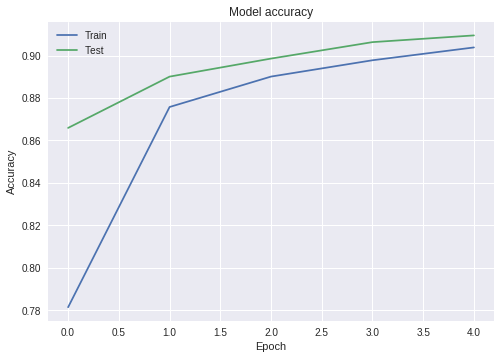

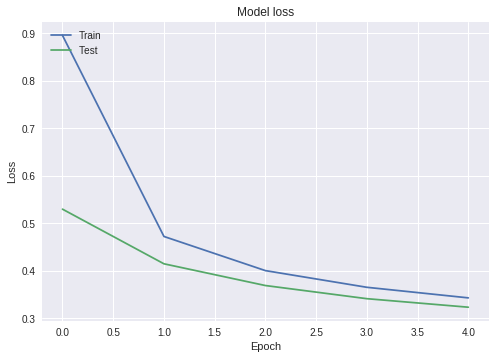

Last validation loss :  0.32363501691818236  | last training loss :  0.34328800495465595
Last validation accuracy :  0.9095  | last training accuracy :  0.9038333
Time taken in training :  24.46976590156555  sec


In [0]:
fc_models['sgd_tanh'] = run_experiment(build_fc_model, 'tanh', 'SGD', 'categorical_crossentropy', train_images, train_labels)

#### SGD with learning rate 0.001 and tanh activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 127us/sample - loss: 1.9205 - categorical_accuracy: 0.4281 - val_loss: 1.5291 - val_categorical_accuracy: 0.6692
Epoch 2/5
48000/48000 [==============================] - 4s 87us/sample - loss: 1.3050 - categorical_accuracy: 0.7319 - val_loss: 1.1259 - val_categorical_accuracy: 0.7661
Epoch 3/5
48000/48000 [==============================] - 4s 85us/sample - loss: 1.0146 - categorical_accuracy: 0.7875 - val_loss: 0.9171 - val_categorical_accuracy: 0.8027
Epoch 4/5
48000/48000 [==============================] - 4s 86us/sample - loss: 0.8545 - categorical_accuracy: 0.8147 - val_loss: 0.7930 - val_categorical_accuracy: 0.8240
Epoch 5/5
48000/48000 [==============================] - 4s 87us/sample - loss: 0.7542 - categorical_accuracy: 0.8319 - val_loss: 0.7109 - val_categorical_accuracy: 0.8366
_________________________________________________________________
Layer (type)           

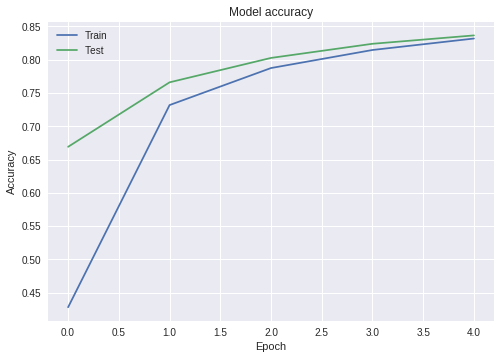

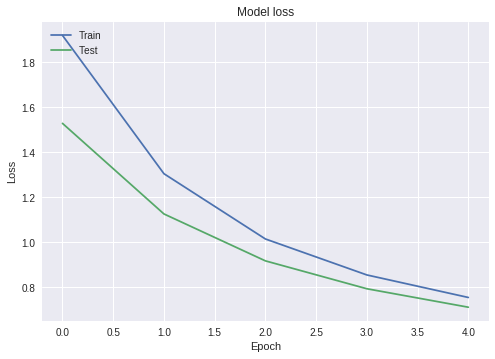

Last validation loss :  0.7108835372924804  | last training loss :  0.7542476077079773
Last validation accuracy :  0.8365833  | last training accuracy :  0.8318958
Time taken in training :  24.809332847595215  sec


In [0]:
fc_models['sgd_0.001_tanh'] = run_experiment(build_fc_model, 'tanh', tf.keras.optimizers.SGD(0.001), 'categorical_crossentropy', train_images, train_labels)

#### SGD with learning rate 0.00465 and tanh activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 126us/sample - loss: 1.1687 - categorical_accuracy: 0.7218 - val_loss: 0.7213 - val_categorical_accuracy: 0.8372
Epoch 2/5
48000/48000 [==============================] - 4s 84us/sample - loss: 0.6173 - categorical_accuracy: 0.8523 - val_loss: 0.5351 - val_categorical_accuracy: 0.8678
Epoch 3/5
48000/48000 [==============================] - 4s 84us/sample - loss: 0.5015 - categorical_accuracy: 0.8740 - val_loss: 0.4603 - val_categorical_accuracy: 0.8800
Epoch 4/5
48000/48000 [==============================] - 4s 84us/sample - loss: 0.4465 - categorical_accuracy: 0.8827 - val_loss: 0.4184 - val_categorical_accuracy: 0.8879
Epoch 5/5
48000/48000 [==============================] - 4s 85us/sample - loss: 0.4130 - categorical_accuracy: 0.8898 - val_loss: 0.3907 - val_categorical_accuracy: 0.8935
_________________________________________________________________
Layer (type)           

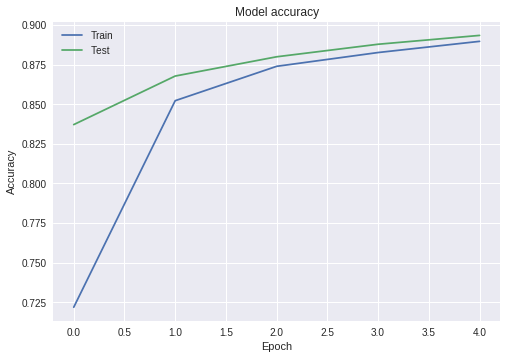

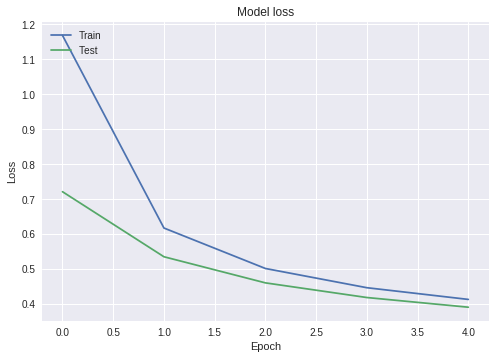

Last validation loss :  0.39066985233624774  | last training loss :  0.41296696801980337
Last validation accuracy :  0.8935  | last training accuracy :  0.88975
Time taken in training :  24.42633819580078  sec


In [0]:
fc_models['sgd_0.00465_tanh'] = run_experiment(build_fc_model, 'tanh', tf.keras.optimizers.SGD(0.00465), 'categorical_crossentropy', train_images, train_labels)

#### Adam and relu activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 141us/sample - loss: 0.3320 - categorical_accuracy: 0.9069 - val_loss: 0.1843 - val_categorical_accuracy: 0.9463
Epoch 2/5
48000/48000 [==============================] - 5s 98us/sample - loss: 0.1536 - categorical_accuracy: 0.9565 - val_loss: 0.1342 - val_categorical_accuracy: 0.9595
Epoch 3/5
48000/48000 [==============================] - 5s 98us/sample - loss: 0.1081 - categorical_accuracy: 0.9694 - val_loss: 0.1014 - val_categorical_accuracy: 0.9706
Epoch 4/5
48000/48000 [==============================] - 5s 98us/sample - loss: 0.0818 - categorical_accuracy: 0.9767 - val_loss: 0.0960 - val_categorical_accuracy: 0.9715
Epoch 5/5
48000/48000 [==============================] - 5s 101us/sample - loss: 0.0654 - categorical_accuracy: 0.9807 - val_loss: 0.0862 - val_categorical_accuracy: 0.9747
_________________________________________________________________
Layer (type)          

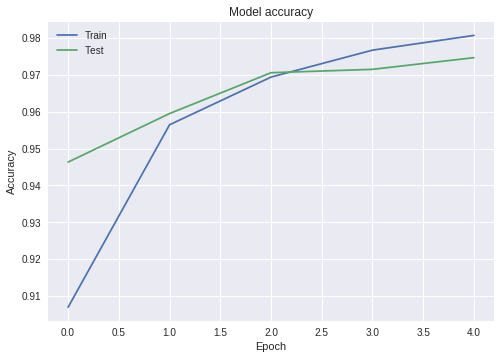

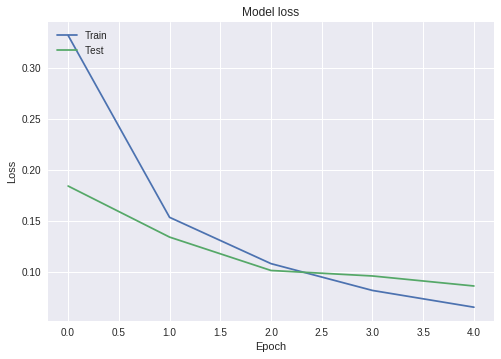

Last validation loss :  0.08621248503774405  | last training loss :  0.0653957677303503
Last validation accuracy :  0.97466666  | last training accuracy :  0.98070836
Time taken in training :  27.997569799423218  sec


In [0]:
fc_models['adam_relu'] = run_experiment(build_fc_model, 'relu', 'adam', 'categorical_crossentropy', train_images, train_labels)

#### SGD and relu activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 130us/sample - loss: 2.0147 - categorical_accuracy: 0.3707 - val_loss: 1.7225 - val_categorical_accuracy: 0.6377
Epoch 2/5
48000/48000 [==============================] - 4s 84us/sample - loss: 1.4991 - categorical_accuracy: 0.7039 - val_loss: 1.2947 - val_categorical_accuracy: 0.7538
Epoch 3/5
48000/48000 [==============================] - 4s 85us/sample - loss: 1.1533 - categorical_accuracy: 0.7742 - val_loss: 1.0217 - val_categorical_accuracy: 0.7989
Epoch 4/5
48000/48000 [==============================] - 4s 86us/sample - loss: 0.9382 - categorical_accuracy: 0.8071 - val_loss: 0.8538 - val_categorical_accuracy: 0.8193
Epoch 5/5
48000/48000 [==============================] - 4s 87us/sample - loss: 0.8031 - categorical_accuracy: 0.8267 - val_loss: 0.7450 - val_categorical_accuracy: 0.8360
_________________________________________________________________
Layer (type)           

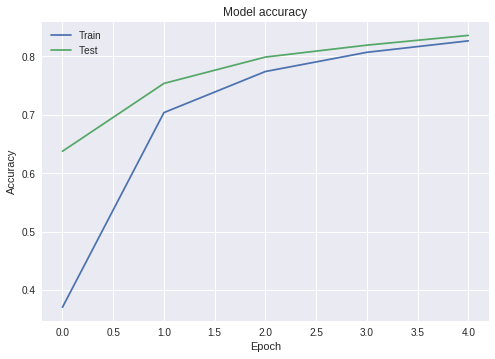

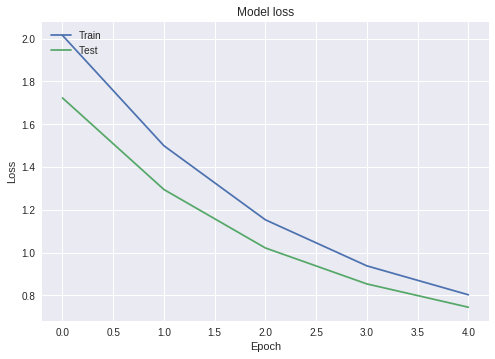

Last validation loss :  0.7449987587928772  | last training loss :  0.8031060738563538
Last validation accuracy :  0.836  | last training accuracy :  0.82666665
Time taken in training :  24.851763248443604  sec


In [0]:
fc_models['sgd_0.001_relu'] = run_experiment(build_fc_model, 'relu', tf.keras.optimizers.SGD(0.001), 'categorical_crossentropy', train_images, train_labels)

#### SGD with learning rate 0.0009 and relu activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 134us/sample - loss: 2.1246 - categorical_accuracy: 0.2856 - val_loss: 1.8711 - val_categorical_accuracy: 0.5554
Epoch 2/5
48000/48000 [==============================] - 4s 88us/sample - loss: 1.6628 - categorical_accuracy: 0.6632 - val_loss: 1.4630 - val_categorical_accuracy: 0.7290
Epoch 3/5
48000/48000 [==============================] - 4s 91us/sample - loss: 1.3086 - categorical_accuracy: 0.7599 - val_loss: 1.1620 - val_categorical_accuracy: 0.7834
Epoch 4/5
48000/48000 [==============================] - 4s 85us/sample - loss: 1.0593 - categorical_accuracy: 0.7985 - val_loss: 0.9586 - val_categorical_accuracy: 0.8102
Epoch 5/5
48000/48000 [==============================] - 4s 86us/sample - loss: 0.8937 - categorical_accuracy: 0.8183 - val_loss: 0.8239 - val_categorical_accuracy: 0.8274
_________________________________________________________________
Layer (type)           

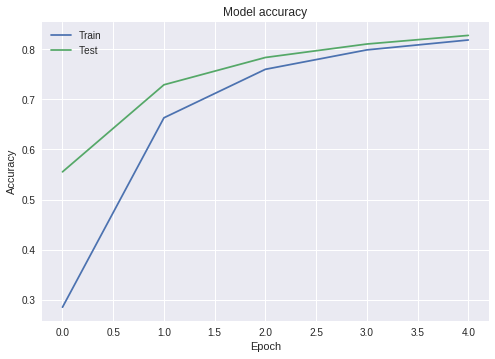

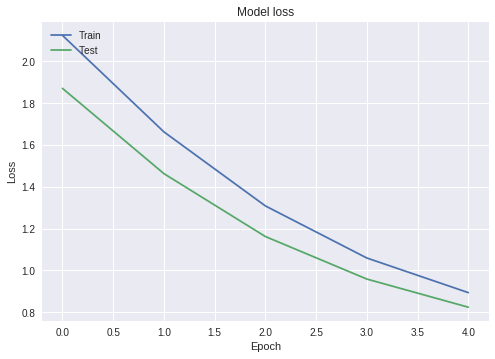

Last validation loss :  0.8238914051055908  | last training loss :  0.8936570182641347
Last validation accuracy :  0.82741666  | last training accuracy :  0.81827086
Time taken in training :  25.428094625473022  sec


In [0]:
fc_models['sgd_0.0009_relu'] = run_experiment(build_fc_model, 'relu', tf.keras.optimizers.SGD(0.0009), 'categorical_crossentropy', train_images, train_labels)

# Best fully connected configuration evaluation

In [0]:
key = get_best_configuration(fc_models)
values = fc_models[key]
print(key, ' has the best validation accuracy ', values[1])
evaluate_model(values[0], test_images, test_labels)

adam_relu  has the best validation accuracy  0.97466666
Test loss: 0.0911650103919208
Test accuracy: 0.9705
Time taken in training :  0.512174129486084  sec


---
# Convolutional configuration experiments
All will use categorical crossentropy loss.

In [0]:
cnn_models = {}

#### Adam optimizer and tanh activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 12s 241us/sample - loss: 0.1396 - categorical_accuracy: 0.9565 - val_loss: 0.0697 - val_categorical_accuracy: 0.9783
Epoch 2/5
48000/48000 [==============================] - 9s 189us/sample - loss: 0.0546 - categorical_accuracy: 0.9830 - val_loss: 0.0497 - val_categorical_accuracy: 0.9854
Epoch 3/5
48000/48000 [==============================] - 9s 183us/sample - loss: 0.0397 - categorical_accuracy: 0.9876 - val_loss: 0.0510 - val_categorical_accuracy: 0.9835
Epoch 4/5
48000/48000 [==============================] - 9s 182us/sample - loss: 0.0294 - categorical_accuracy: 0.9913 - val_loss: 0.0453 - val_categorical_accuracy: 0.9857
Epoch 5/5
48000/48000 [==============================] - 9s 181us/sample - loss: 0.0274 - categorical_accuracy: 0.9914 - val_loss: 0.0448 - val_categorical_accuracy: 0.9862
_________________________________________________________________
Layer (type)      

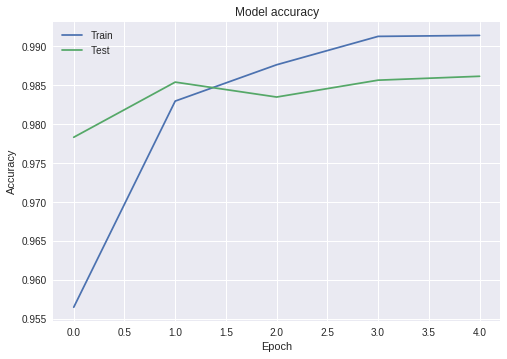

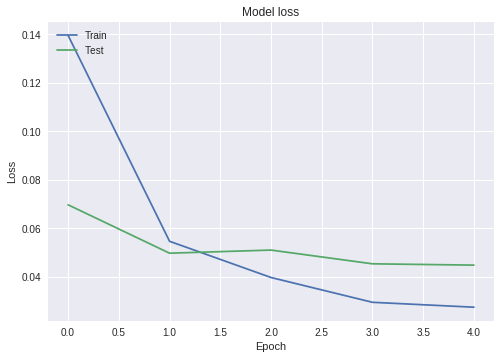

Last validation loss :  0.04478418886351088  | last training loss :  0.027422362679770836
Last validation accuracy :  0.98616666  | last training accuracy :  0.9914167
Time taken in training :  49.66046357154846  sec


In [0]:
cnn_models['adam_tanh'] = run_experiment(build_cnn_model, 'tanh', 'adam', 'categorical_crossentropy', train_images, train_labels)

#### Adam with learning rate 0.01 and tanh activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 12s 247us/sample - loss: 0.2246 - categorical_accuracy: 0.9355 - val_loss: 0.1723 - val_categorical_accuracy: 0.9465
Epoch 2/5
48000/48000 [==============================] - 9s 184us/sample - loss: 0.2075 - categorical_accuracy: 0.9375 - val_loss: 0.2097 - val_categorical_accuracy: 0.9334
Epoch 3/5
48000/48000 [==============================] - 9s 185us/sample - loss: 0.2554 - categorical_accuracy: 0.9232 - val_loss: 0.2788 - val_categorical_accuracy: 0.9128
Epoch 4/5
48000/48000 [==============================] - 9s 182us/sample - loss: 0.2916 - categorical_accuracy: 0.9114 - val_loss: 0.3056 - val_categorical_accuracy: 0.9094
Epoch 5/5
48000/48000 [==============================] - 9s 190us/sample - loss: 0.3152 - categorical_accuracy: 0.9015 - val_loss: 0.3030 - val_categorical_accuracy: 0.9131
_________________________________________________________________
Layer (type)      

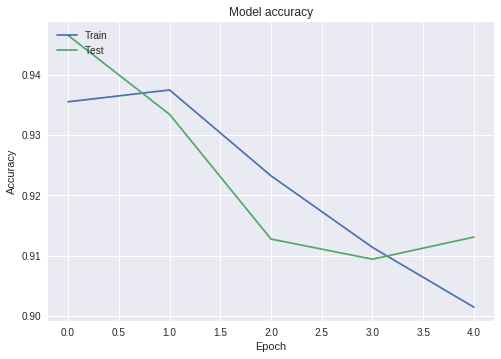

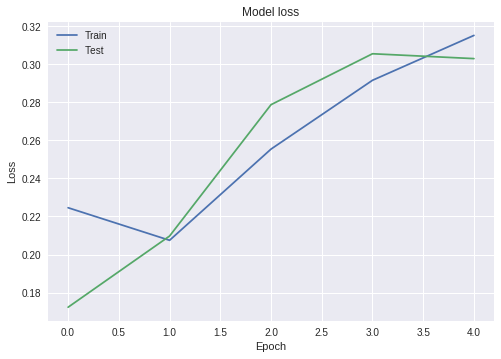

Last validation loss :  0.30299906196196874  | last training loss :  0.3151985639979442
Last validation accuracy :  0.9130833  | last training accuracy :  0.9014583
Time taken in training :  50.07255673408508  sec


In [0]:
cnn_models['adam_0.01_tanh'] = run_experiment(build_cnn_model, 'tanh', tf.keras.optimizers.Adam(0.01), 'categorical_crossentropy', train_images, train_labels)

#### Adam with learning rate 0.005 and tanh activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 11s 236us/sample - loss: 0.1807 - categorical_accuracy: 0.9460 - val_loss: 0.0995 - val_categorical_accuracy: 0.9688
Epoch 2/5
48000/48000 [==============================] - 9s 189us/sample - loss: 0.0899 - categorical_accuracy: 0.9726 - val_loss: 0.0874 - val_categorical_accuracy: 0.9726
Epoch 3/5
48000/48000 [==============================] - 9s 190us/sample - loss: 0.0827 - categorical_accuracy: 0.9743 - val_loss: 0.1093 - val_categorical_accuracy: 0.9681
Epoch 4/5
48000/48000 [==============================] - 9s 192us/sample - loss: 0.0854 - categorical_accuracy: 0.9741 - val_loss: 0.0993 - val_categorical_accuracy: 0.9713
Epoch 5/5
48000/48000 [==============================] - 9s 183us/sample - loss: 0.0833 - categorical_accuracy: 0.9740 - val_loss: 0.0985 - val_categorical_accuracy: 0.9697
_________________________________________________________________
Layer (type)      

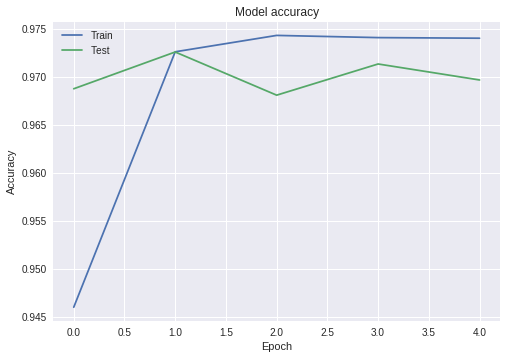

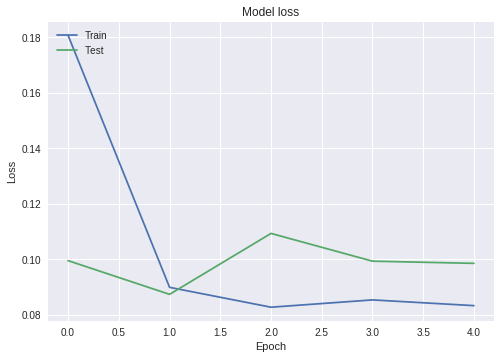

Last validation loss :  0.0985477549880743  | last training loss :  0.08330577919166535
Last validation accuracy :  0.96966666  | last training accuracy :  0.97402084
Time taken in training :  50.204779386520386  sec


In [0]:
cnn_models['adam_0.005_tanh'] = run_experiment(build_cnn_model, 'tanh', tf.keras.optimizers.Adam(0.005), 'categorical_crossentropy', train_images, train_labels)

#### SGD and tanh activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 204us/sample - loss: 0.7161 - categorical_accuracy: 0.8178 - val_loss: 0.3181 - val_categorical_accuracy: 0.9096
Epoch 2/5
48000/48000 [==============================] - 7s 150us/sample - loss: 0.2689 - categorical_accuracy: 0.9241 - val_loss: 0.2115 - val_categorical_accuracy: 0.9406
Epoch 3/5
48000/48000 [==============================] - 7s 150us/sample - loss: 0.1961 - categorical_accuracy: 0.9439 - val_loss: 0.1613 - val_categorical_accuracy: 0.9556
Epoch 4/5
48000/48000 [==============================] - 7s 149us/sample - loss: 0.1548 - categorical_accuracy: 0.9564 - val_loss: 0.1290 - val_categorical_accuracy: 0.9643
Epoch 5/5
48000/48000 [==============================] - 7s 148us/sample - loss: 0.1285 - categorical_accuracy: 0.9634 - val_loss: 0.1090 - val_categorical_accuracy: 0.9701
_________________________________________________________________
Layer (type)      

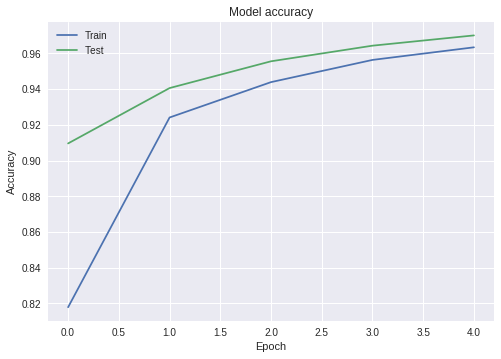

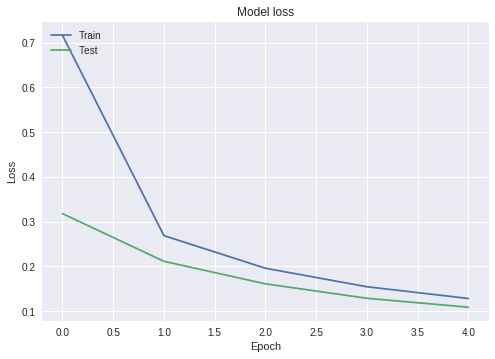

Last validation loss :  0.10904256647825242  | last training loss :  0.12853660616775353
Last validation accuracy :  0.97008336  | last training accuracy :  0.9634167
Time taken in training :  40.89606785774231  sec


In [0]:
cnn_models['sgd_tanh'] = run_experiment(build_cnn_model, 'tanh', 'sgd', 'categorical_crossentropy', train_images, train_labels)

#### SGD with learning rate 0.001 and tanh activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 200us/sample - loss: 2.1334 - categorical_accuracy: 0.3858 - val_loss: 1.8583 - val_categorical_accuracy: 0.6600
Epoch 2/5
48000/48000 [==============================] - 7s 155us/sample - loss: 1.4269 - categorical_accuracy: 0.7336 - val_loss: 1.0286 - val_categorical_accuracy: 0.7827
Epoch 3/5
48000/48000 [==============================] - 8s 161us/sample - loss: 0.8271 - categorical_accuracy: 0.8174 - val_loss: 0.6733 - val_categorical_accuracy: 0.8459
Epoch 4/5
48000/48000 [==============================] - 8s 159us/sample - loss: 0.6030 - categorical_accuracy: 0.8568 - val_loss: 0.5317 - val_categorical_accuracy: 0.8713
Epoch 5/5
48000/48000 [==============================] - 8s 157us/sample - loss: 0.5004 - categorical_accuracy: 0.8749 - val_loss: 0.4555 - val_categorical_accuracy: 0.8877
_________________________________________________________________
Layer (type)      

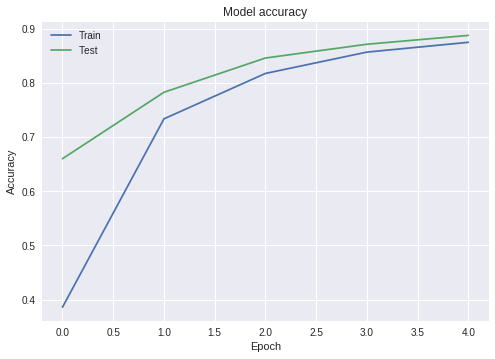

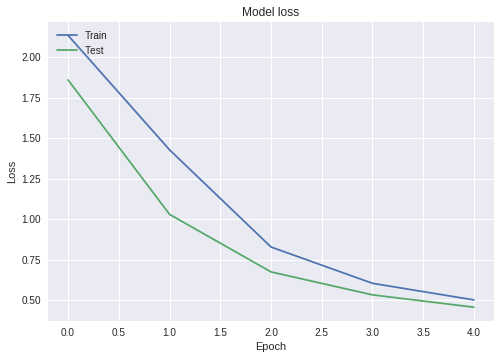

Last validation loss :  0.45547159695625306  | last training loss :  0.5004099428653717
Last validation accuracy :  0.88766664  | last training accuracy :  0.8749167
Time taken in training :  42.349854707717896  sec


In [0]:
cnn_models['sgd_0.001_tanh'] = run_experiment(build_cnn_model, 'tanh', tf.keras.optimizers.SGD(0.001), 'categorical_crossentropy', train_images, train_labels)

#### SGD with learning rate 0.005 and tanh activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 205us/sample - loss: 0.9991 - categorical_accuracy: 0.7687 - val_loss: 0.4473 - val_categorical_accuracy: 0.8854
Epoch 2/5
48000/48000 [==============================] - 7s 156us/sample - loss: 0.3755 - categorical_accuracy: 0.8974 - val_loss: 0.3124 - val_categorical_accuracy: 0.9144
Epoch 3/5
48000/48000 [==============================] - 8s 157us/sample - loss: 0.2915 - categorical_accuracy: 0.9185 - val_loss: 0.2542 - val_categorical_accuracy: 0.9296
Epoch 4/5
48000/48000 [==============================] - 8s 156us/sample - loss: 0.2456 - categorical_accuracy: 0.9305 - val_loss: 0.2178 - val_categorical_accuracy: 0.9390
Epoch 5/5
48000/48000 [==============================] - 8s 157us/sample - loss: 0.2130 - categorical_accuracy: 0.9389 - val_loss: 0.1895 - val_categorical_accuracy: 0.9482
_________________________________________________________________
Layer (type)      

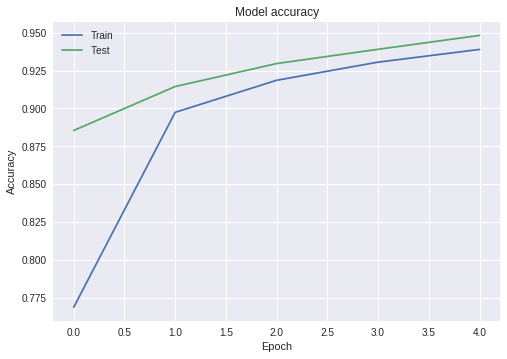

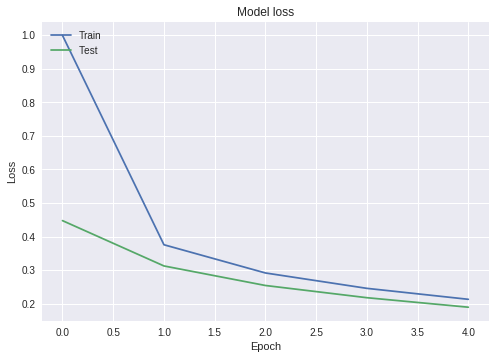

Last validation loss :  0.18947235067685445  | last training loss :  0.21299565037091572
Last validation accuracy :  0.94816667  | last training accuracy :  0.9389167
Time taken in training :  42.358307123184204  sec


In [0]:
cnn_models['sgd_0.005_tanh'] = run_experiment(build_cnn_model, 'tanh', tf.keras.optimizers.SGD(0.005), 'categorical_crossentropy', train_images, train_labels)

#### SGD with learning rate 0.0055 and tanh activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 207us/sample - loss: 0.9680 - categorical_accuracy: 0.7635 - val_loss: 0.4389 - val_categorical_accuracy: 0.8839
Epoch 2/5
48000/48000 [==============================] - 8s 157us/sample - loss: 0.3724 - categorical_accuracy: 0.8964 - val_loss: 0.3042 - val_categorical_accuracy: 0.9162
Epoch 3/5
48000/48000 [==============================] - 8s 162us/sample - loss: 0.2850 - categorical_accuracy: 0.9187 - val_loss: 0.2431 - val_categorical_accuracy: 0.9316
Epoch 4/5
48000/48000 [==============================] - 8s 166us/sample - loss: 0.2356 - categorical_accuracy: 0.9330 - val_loss: 0.2044 - val_categorical_accuracy: 0.9427
Epoch 5/5
48000/48000 [==============================] - 7s 150us/sample - loss: 0.2015 - categorical_accuracy: 0.9422 - val_loss: 0.1758 - val_categorical_accuracy: 0.9516
_________________________________________________________________
Layer (type)      

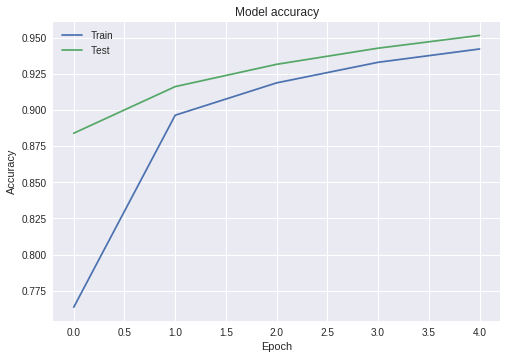

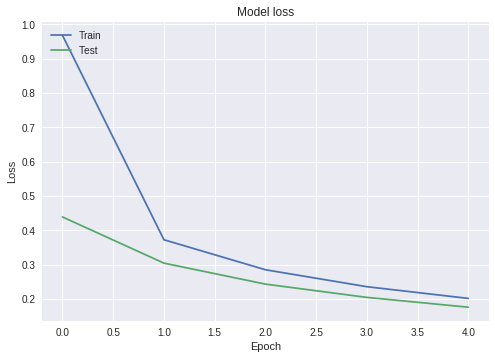

Last validation loss :  0.17580808498462042  | last training loss :  0.2014609561562538
Last validation accuracy :  0.9515833  | last training accuracy :  0.9421875
Time taken in training :  42.91641426086426  sec


In [0]:
cnn_models['sgd_0.0055_tanh'] = run_experiment(build_cnn_model, 'tanh', tf.keras.optimizers.SGD(0.0055), 'categorical_crossentropy', train_images, train_labels)

#### SGD and relu activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 213us/sample - loss: 0.8501 - categorical_accuracy: 0.7644 - val_loss: 0.2536 - val_categorical_accuracy: 0.9273
Epoch 2/5
48000/48000 [==============================] - 7s 151us/sample - loss: 0.2251 - categorical_accuracy: 0.9310 - val_loss: 0.1614 - val_categorical_accuracy: 0.9510
Epoch 3/5
48000/48000 [==============================] - 7s 151us/sample - loss: 0.1546 - categorical_accuracy: 0.9537 - val_loss: 0.1200 - val_categorical_accuracy: 0.9638
Epoch 4/5
48000/48000 [==============================] - 8s 157us/sample - loss: 0.1207 - categorical_accuracy: 0.9640 - val_loss: 0.1016 - val_categorical_accuracy: 0.9691
Epoch 5/5
48000/48000 [==============================] - 8s 158us/sample - loss: 0.0987 - categorical_accuracy: 0.9698 - val_loss: 0.0975 - val_categorical_accuracy: 0.9688
_________________________________________________________________
Layer (type)      

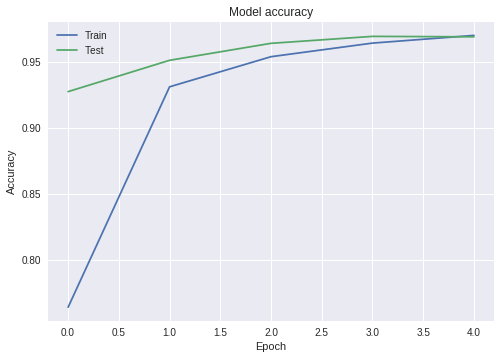

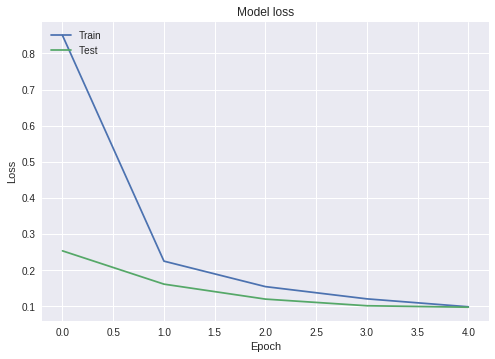

Last validation loss :  0.09753970853736003  | last training loss :  0.09872187430908283
Last validation accuracy :  0.96875  | last training accuracy :  0.9698125
Time taken in training :  42.44763159751892  sec


In [0]:
cnn_models['sgd_relu'] = run_experiment(build_cnn_model, 'relu', tf.keras.optimizers.SGD(), 'categorical_crossentropy', train_images, train_labels)

#### SGD with learning rate 0.001 and relu activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 11s 222us/sample - loss: 2.2498 - categorical_accuracy: 0.2259 - val_loss: 2.1712 - val_categorical_accuracy: 0.4117
Epoch 2/5
48000/48000 [==============================] - 8s 161us/sample - loss: 1.9475 - categorical_accuracy: 0.5773 - val_loss: 1.5446 - val_categorical_accuracy: 0.7204
Epoch 3/5
48000/48000 [==============================] - 8s 159us/sample - loss: 1.0281 - categorical_accuracy: 0.7795 - val_loss: 0.6693 - val_categorical_accuracy: 0.8306
Epoch 4/5
48000/48000 [==============================] - 7s 154us/sample - loss: 0.5524 - categorical_accuracy: 0.8515 - val_loss: 0.4556 - val_categorical_accuracy: 0.8754
Epoch 5/5
48000/48000 [==============================] - 7s 151us/sample - loss: 0.4255 - categorical_accuracy: 0.8788 - val_loss: 0.3766 - val_categorical_accuracy: 0.8944
_________________________________________________________________
Layer (type)      

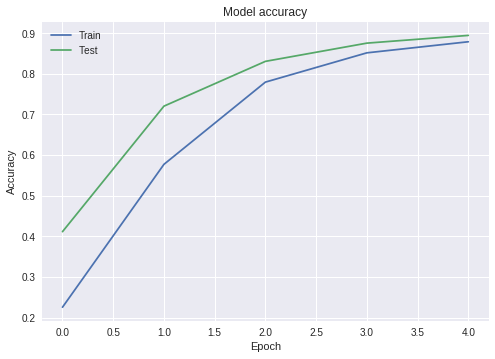

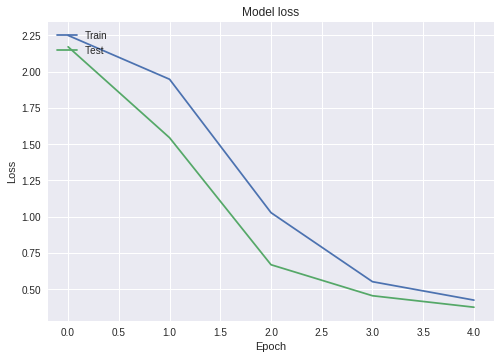

Last validation loss :  0.37661323316891987  | last training loss :  0.4255420411427816
Last validation accuracy :  0.8944167  | last training accuracy :  0.8787917
Time taken in training :  43.33968257904053  sec


In [0]:
cnn_models['sgd_0.001_relu'] = run_experiment(build_cnn_model, 'relu', tf.keras.optimizers.SGD(0.001), 'categorical_crossentropy', train_images, train_labels)

#### SGD with learning rate 0.00165 and relu activation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 11s 223us/sample - loss: 2.1396 - categorical_accuracy: 0.3973 - val_loss: 1.7895 - val_categorical_accuracy: 0.6498
Epoch 2/5
48000/48000 [==============================] - 8s 159us/sample - loss: 1.0294 - categorical_accuracy: 0.7704 - val_loss: 0.5636 - val_categorical_accuracy: 0.8550
Epoch 3/5
48000/48000 [==============================] - 8s 159us/sample - loss: 0.4647 - categorical_accuracy: 0.8728 - val_loss: 0.3860 - val_categorical_accuracy: 0.8854
Epoch 4/5
48000/48000 [==============================] - 8s 159us/sample - loss: 0.3521 - categorical_accuracy: 0.8989 - val_loss: 0.3033 - val_categorical_accuracy: 0.9115
Epoch 5/5
48000/48000 [==============================] - 8s 157us/sample - loss: 0.2983 - categorical_accuracy: 0.9119 - val_loss: 0.2650 - val_categorical_accuracy: 0.9228
_________________________________________________________________
Layer (type)      

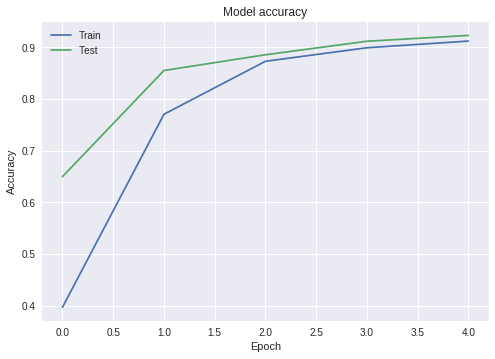

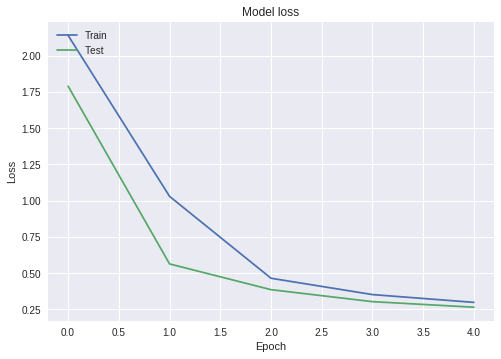

Last validation loss :  0.26501761094729104  | last training loss :  0.29830213260650634
Last validation accuracy :  0.9228333  | last training accuracy :  0.9118958
Time taken in training :  43.8600389957428  sec


In [0]:
cnn_models['sgd_0.00165_relu'] = run_experiment(build_cnn_model, 'relu', tf.keras.optimizers.SGD(0.00165), 'categorical_crossentropy', train_images, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 12s 253us/sample - loss: 0.1685 - categorical_accuracy: 0.9478 - val_loss: 0.0612 - val_categorical_accuracy: 0.9808
Epoch 2/5
48000/48000 [==============================] - 9s 186us/sample - loss: 0.0502 - categorical_accuracy: 0.9841 - val_loss: 0.0389 - val_categorical_accuracy: 0.9872
Epoch 3/5
48000/48000 [==============================] - 9s 184us/sample - loss: 0.0342 - categorical_accuracy: 0.9894 - val_loss: 0.0445 - val_categorical_accuracy: 0.9861
Epoch 4/5
48000/48000 [==============================] - 9s 183us/sample - loss: 0.0256 - categorical_accuracy: 0.9920 - val_loss: 0.0416 - val_categorical_accuracy: 0.9868
Epoch 5/5
48000/48000 [==============================] - 9s 183us/sample - loss: 0.0204 - categorical_accuracy: 0.9939 - val_loss: 0.0319 - val_categorical_accuracy: 0.9902
_________________________________________________________________
Layer (type)      

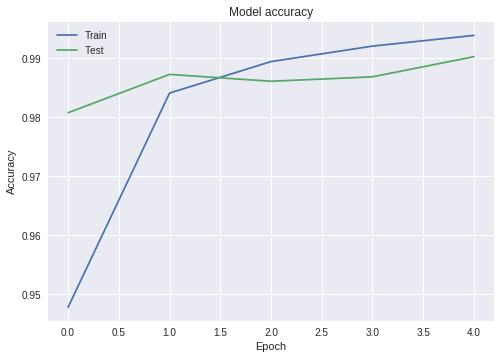

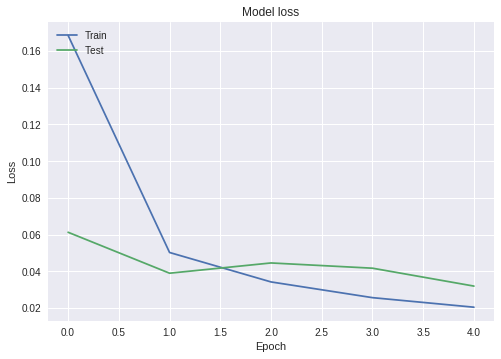

Last validation loss :  0.03189373222133145  | last training loss :  0.020388831514923367
Last validation accuracy :  0.99025  | last training accuracy :  0.99385417
Time taken in training :  50.58485269546509  sec


In [0]:
cnn_models['adam_0.0009_relu'] = run_experiment(build_cnn_model, 'relu', tf.keras.optimizers.Adam(0.0009), 'categorical_crossentropy', train_images, train_labels)

## CNN model evaluation

In [0]:
key = get_best_configuration(cnn_models)
values = cnn_models[key]
print(key, ' has the best validation accuracy ', values[1])
evaluate_model(values[0], test_images, test_labels)

adam_0.0009_relu  has the best validation accuracy  0.99025
Test loss: 0.03254169241283089
Test accuracy: 0.9891
Time taken in training :  0.7434859275817871  sec


# Last task

In [0]:
best_model = get_best_configuration(cnn_models)
predictions = cnn_models[best_model][0].predict(test_images)

print(predictions[0])
print('Predicted digit : ', np.where(predictions[0] == np.amax(predictions[0]))[0][0])

#TODO: identify the digit with the highest confidence prediction for the first image in the test dataset

print('Correct digit : ', np.where(1 == test_labels[0])[0][0])

[7.4170905e-09 6.3201037e-07 3.0762595e-07 3.4817189e-05 4.1947651e-08
 2.1944260e-08 3.1757766e-10 9.9995959e-01 2.5718603e-07 4.3169143e-06]
Predicted digit :  7
Correct digit :  7
